# Principal Component Analysis

# Agenda

1. PCA basics
    - Eigenvalues significance
    - Eigenvectors significance
2. Data set
    - Download data
    - Define feature columns
    - Normalize data
3. Correlation between different features
4. Linear Regesion 
5. Linear Regesion with PCA
    - Elbow curve
    - Correlation Matrix
6. Random Forest
7. Random Forest with PCA
8. Conclusion


# PCA
Principal component analysis is a statistical procedure that uses an **orthogonal transformation** to convert a set of observations of possibly **correlated variables** into a set of values of **linearly uncorrelated variables** called principal components
- With PCA we can reduce the dimentions with out losing much information
- PCA also helps to remove the multicollinearity between the variables

**Reducing** the **dimension** of the feature space is called **dimensionality reduction.** There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:
- Feature Elimination
- Feature Extraction

Our goal is to identify the features that capture the most variance in the input dataset.
**Eigenvalue** for a priciple component measures the variance in all the variables which is accounted for by that principal component.
**Eigenvector** indicates the direction of a vector. Eigen vectore with largest eigenvalue is the direction alog which the dataset has maximum variance.
Dimensionality reduction can be achieved by Linear transformations of input data.

Eigen vector Equation:  **Av = $\gamma$.v **

Where A = Input normalized matrix
      v = Eigen vectors
      $\gamma$ = Eigenvalues

**PCA** brings together:

1. A measure of how each variable is associated with one another. (Covariance matrix.)
2. The directions in which our data are dispersed. (Eigenvectors.)
3. The relative importance of these different directions. (Eigenvalues.)

PCA combines our predictors and allows us to drop the eigenvectors that are relatively unimportant.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
plt.style.use('fivethirtyeight')
import seaborn as sns
import time
import random
from sklearn import metrics
%matplotlib inline

C:\Users\s.mudalapuram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Dataset information
[**SPECTF**](https://archive.ics.uci.edu/ml/machine-learning-databases/spect/) dataset from UCI machine learning repository

   The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images.
   Each of the patients is classified into two categories: normal and abnormal.
   The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images.
   As a result, 44 continuous feature pattern was created for each patient.

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.train'
col_names = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_d= pd.read_table(url,sep=',',names=col_names)

In [4]:
#check the head of the data
spectf_d.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


Text(0.5,1,'Correlation between different features')

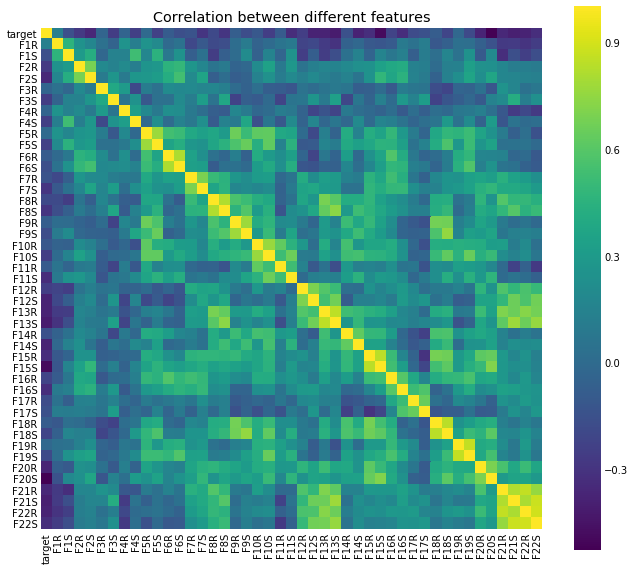

In [5]:
#check the correlation between the variables
correlation = spectf_d.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

# Separate out the Target and Input variables from training and testing data

In [6]:
target = spectf_d['target']
spectf_d.drop('target',axis=1,inplace=True)

In [7]:
spectf_d.shape

(80, 44)

In [8]:
url_t = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test'
col_names = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_t= pd.read_table(url_t,sep=',',names=col_names)

In [9]:
target_t = spectf_t['target']
spectf_t.drop('target',axis=1,inplace=True)

In [10]:
spectf_t.shape

(187, 44)

# Normalize all the input columns

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
spectf = scaler.fit_transform(spectf_d)
spectt = scaler.fit_transform(spectf_t)

In [12]:
spectf

array([[-1.73592319, -2.27310275,  0.07672715, ...,  0.78938997,
         0.74915189,  0.99016585],
       [ 0.60262619, -0.81130034, -0.09377763, ...,  0.52330347,
         0.00233381,  0.24287087],
       [ 0.42273777, -0.81130034,  0.07672715, ..., -2.13756161,
        -0.46442749, -0.75352244],
       ...,
       [-0.29681588, -0.51893986,  0.58824149, ...,  1.32156299,
         1.02920866,  1.07319862],
       [-0.11692747, -0.37275961,  0.41773671, ..., -0.80712907,
         0.18903833, -0.91958799],
       [-0.4767043 , -1.98074227, -0.09377763, ...,  0.25721696,
         0.28239059,  0.32590364]])

In [13]:
spectt

array([[ 0.20940529,  0.41596002,  0.68734602, ...,  0.96547463,
         0.59118869,  1.28968911],
       [ 1.10446332,  1.00822796,  0.39455854, ..., -0.02516326,
         0.44098178,  0.22637971],
       [ 1.99952135,  0.02111472, -0.33741018, ...,  0.34632595,
        -0.61046658, -0.43818867],
       ...,
       [ 1.10446332,  0.90951664,  0.54095228, ...,  1.0273895 ,
         1.19201632,  1.48905963],
       [-0.68565274, -0.17630793,  0.54095228, ...,  1.08930437,
         1.41732668,  1.42260279],
       [-0.12624147,  0.21853737, -0.04462269, ...,  0.34632595,
         0.44098178,  0.35929338]])

# Logistic Regression

In [14]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(C=1e42)

# fit model
logreg.fit(spectf, target)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# make class predictions for the testing set
y_pred_class = logreg.predict(spectt)

In [16]:
# calculate accuracy and other metrics
from sklearn import metrics
print(metrics.accuracy_score(target_t, y_pred_class))
print (metrics.precision_recall_fscore_support(target_t, y_pred_class, average='weighted'))
print(metrics.confusion_matrix(target_t,y_pred_class))

0.5347593582887701
(0.8994902156666863, 0.5347593582887701, 0.6328658012844995, None)
[[12  3]
 [84 88]]


# Applying PCA to logistic regression model

Text(15,0.9,'15')

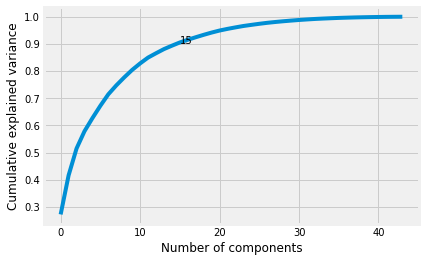

In [17]:
from sklearn.decomposition import PCA
pca = PCA().fit(spectf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('15',xy=(15, .90))

**Elbow** method helps us to select the number of priciple componets required

In [18]:
#consider first 15 components as they are explaining the 90% of variation in the data
x_pca = PCA(n_components=15)
spectf_pca = x_pca.fit_transform(spectf)
spectf_test = x_pca.fit_transform(spectt)

Text(0.5,1,'Correlation between different features')

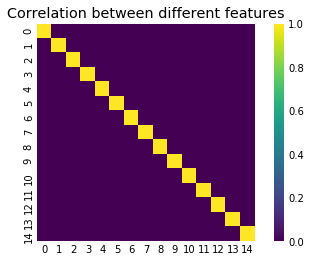

In [19]:
#correlation between the variables after transforming the data with PCA is 0
correlation = pd.DataFrame(spectf_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

**Every principal component** will ALWAYS be orthogonal(perpendicular) to every other principal component

In [20]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
pcalg = LogisticRegression(C=1e42)

# fit model
pcalg.fit(spectf_pca, target)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# make class predictions for the testing set
y_pred_class_pca = pcalg.predict(spectf_test)

In [22]:
# calculate accuracy
print(metrics.accuracy_score(target_t, y_pred_class_pca))
print (metrics.precision_recall_fscore_support(target_t, y_pred_class_pca, average='weighted'))
print(metrics.confusion_matrix(target_t,y_pred_class_pca))

0.5775401069518716
(0.9124078872411193, 0.5775401069518716, 0.6695255324164137, None)
[[13  2]
 [77 95]]


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(max_depth = 5, min_samples_split=2, n_estimators = 10, random_state = 103)
rf_model=rf_clf.fit(spectf,target)
rf_prediction = rf_model.predict(spectt)

In [24]:
#calculate accuracy and other metrics
print(metrics.accuracy_score(target_t,rf_prediction))
print(metrics.precision_recall_fscore_support(target_t,rf_prediction, average='weighted'))
print(metrics.confusion_matrix(target_t,rf_prediction))

0.4919786096256685
(0.9185413329121447, 0.4919786096256685, 0.5899199601749517, None)
[[14  1]
 [94 78]]


# Applying PCA to Random Forest model

In [25]:
rfClassifier=RandomForestClassifier(max_depth = 5, min_samples_split=2, n_estimators = 10, random_state = 103)
rfClassifier.fit(spectf_pca,target)
rfClassifier.score(spectf_pca,target)

0.975

In [26]:
# Now test the model
# Consider first 15 components as they are explaining the 90% of variation in the data
test_pred = rfClassifier.predict(spectf_test)
#calculate accuracy and other metrics
print(metrics.accuracy_score(target_t,test_pred))
print(metrics.precision_recall_fscore_support(target_t,test_pred, average='weighted'))
print(metrics.confusion_matrix(target_t,test_pred))


0.5133689839572193
(0.9083674111355772, 0.5133689839572193, 0.6119283935717902, None)
[[13  2]
 [89 83]]


**Conclusion** 

Any algorithm with PCA outperforms with out PCA.